# Introduction

In this project, I'll be working with a dataset containing different information on various cars. For each car, we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, and more.  Using this information, I'll be using the K-Nearest Neighbours algorithm to predict a car's market price

**Reading and Exploring the Data**

In [240]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

import matplotlib.pyplot as plt
%matplotlib inline



cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv('imports-85.data', names=cols)

cars.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [241]:
cars.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
       'price'],
      dtype='object')

Since the aim of this project is to predict the price of a car, the target column to predict would be the 'price' column.  We can see from looking at the dataset [information](https://archive.ics.uci.edu/ml/datasets/automobile) that 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', highway-mpg' are the columns with continous values that we can use as features for our prediction, so let's drop the rest apart from the 'price' column

In [242]:
continous_cols = ['normalized-losses','wheel-base', 'length', 'width', 'height', 'curb-weight',  'engine-size', 'bore', 'stroke',
       'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

numeric_cars = cars[continous_cols]

numeric_cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [243]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-size          205 non-null int64
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-null object
peak-rpm             205 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                205 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


The normalized-losses column was cast into an object type, likely due to the question marks in the columns, so let's replace this with NaN and change the datatypes for the other numerical columns while we're at it

**Data Cleaning and Normalization**

In [244]:
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [245]:
numeric_cols = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']

numeric_cars = numeric_cars.astype(float)

numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    164 non-null float64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null float64
engine-size          205 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-null float64
city-mpg             205 non-null float64
highway-mpg          205 non-null float64
price                201 non-null float64
dtypes: float64(15)
memory usage: 24.1 KB


We can see the normalized losses column has a lot of missing values when compared to the other columns.

In [246]:
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Since we're predicting price, let's drop rows with any missing price values.

In [247]:
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

There aren't that many missing rows of data in this dataset, so filling in the missing values with the mean of the column is a suitable method for cleaning the data.

In [248]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Let's now normalize the values of the columns (except the target column) so that they are all within the same range!

In [249]:
price_col = numeric_cars['price']
normalized_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
normalized_cars['price'] = price_col
normalized_cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


**Univariate KNN Model**

Let's begin by doing a simple univariate model

In [250]:

def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
    
    #randomize the order of rows & reindex
    df_random = np.random.permutation(df.index)
    df = df.reindex(df_random)
    
    #Divide number of rows by 2 and round to get split data
    train_data_row = int((len(df))/2)
    
    #Split data into training and test set
    train_df = df.iloc[0:train_data_row]
    test_df = df.iloc[train_data_row:]
    
    k_rmse_values = {}
    k_values = [1,3,5,7,9]
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])
        predictions = knn.predict(test_df[[train_col]])
    
        rmse = ((mean_squared_error(test_df[target_col], predictions))**0.5)
            
        k_rmse_values[k] = rmse
        
    return k_rmse_values


#Train a model for each column and return results

k_rmse_results = {}
#Drop the price column
train_cols = normalized_cars.columns.drop('price')

for col in train_cols:
    rmse_vals = knn_train_test(col, 'price', normalized_cars)
    k_rmse_results[col] = rmse_vals
    
k_rmse_results
    

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city-mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'engine-size': {1: 3258.4861059962027,
  3: 2840.562805643501,
  5: 3238.4628296477176,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway-mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.8492630885

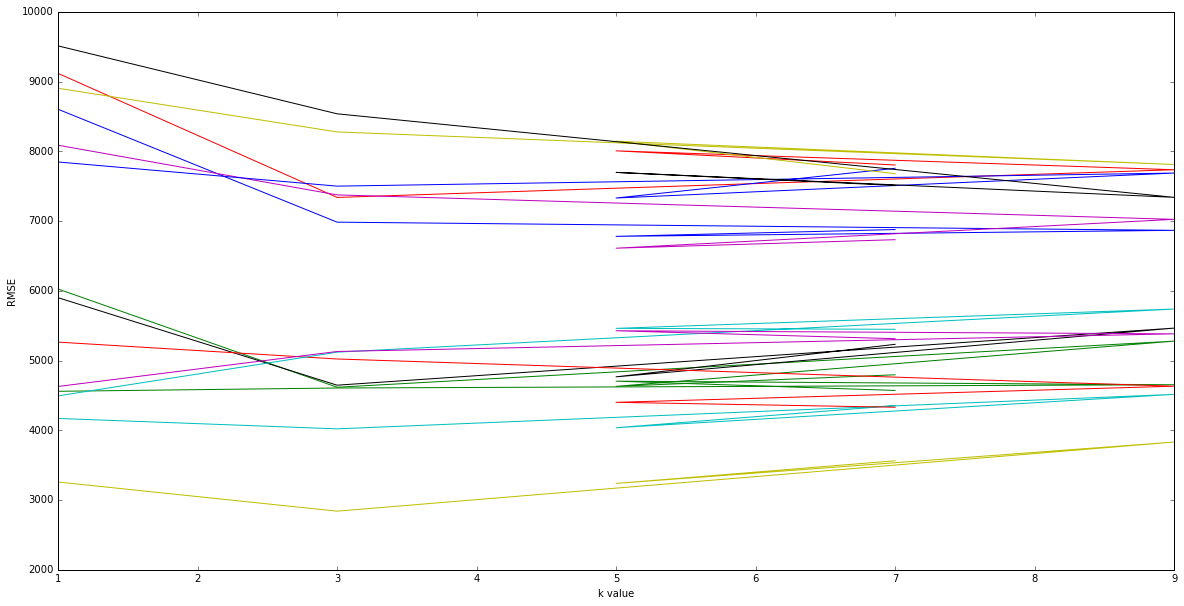

In [251]:
#Visualising these results


plt.figure(figsize=(20,10))
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')



**Multivariate Model**

In [252]:
#Average RMSE across different k values for each feature

feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
    
#Turn it into a series for the next step

series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()

sorted_features = sorted_series_avg_rmse.index

sorted_features

Index(['engine-size', 'horsepower', 'width', 'curb-weight', 'highway-mpg',
       'length', 'city-mpg', 'wheel-base', 'compression-rate', 'bore',
       'normalized-losses', 'stroke', 'peak-rpm', 'height'],
      dtype='object')

In [253]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    #randomize the order of rows & reindex
    df_random = np.random.permutation(df.index)
    df = df.reindex(df_random)
    
    #Divide number of rows by 2 and round to get split data
    train_data_row = int((len(df))/2)
    
    #Split data into training and test set
    train_df = df.iloc[0:train_data_row]
    test_df = df.iloc[train_data_row:]
    
    k_rmse_values = {}
    k_values = [5]
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])
        predictions = knn.predict(test_df[train_cols])
    
        rmse = ((mean_squared_error(test_df[target_col], predictions))**0.5)
            
        k_rmse_values[k] = rmse
        
    return k_rmse_values




k_rmse_results = {}


for nr_best_feats in range(2,7):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test(
        sorted_features[:nr_best_feats],
        'price',
        normalized_cars
    )

k_rmse_results
    


{'2 best features': {5: 2949.8817277180374},
 '3 best features': {5: 3580.7376651928435},
 '4 best features': {5: 3487.340917327035},
 '5 best features': {5: 3410.2170133901805},
 '6 best features': {5: 3478.510890118539}}

We can see the models with 2, 3 and 4 features performed the best, so we'll use these to further optimise the model, by tuning the n_neighbors hyperparameter to find the most optimal.

**Hyperparameter Tuning**

In [254]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    #randomize the order of rows & reindex
    df_random = np.random.permutation(df.index)
    df = df.reindex(df_random)
    
    #Divide number of rows by 2 and round to get split data
    train_data_row = int((len(df))/2)
    
    #Split data into training and test set
    train_df = df.iloc[0:train_data_row]
    test_df = df.iloc[train_data_row:]
    
    k_rmse_values = {}
    k_values = [i for i in range(1, 25)]
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])
        predictions = knn.predict(test_df[train_cols])
    
        rmse = ((mean_squared_error(test_df[target_col], predictions))**0.5)
            
        k_rmse_values[k] = rmse
        
    return k_rmse_values




k_rmse_results = {}


for nr_best_feats in range(2,5):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test(
        sorted_features[:nr_best_feats],
        'price',
        normalized_cars
    )

k_rmse_results

{'2 best features': {1: 2783.6204237227344,
  2: 2657.7963807419765,
  3: 2792.586573031673,
  4: 2891.5329686923255,
  5: 2949.8817277180374,
  6: 3096.402601694776,
  7: 3164.681969020496,
  8: 3413.228359192009,
  9: 3748.6716603306486,
  10: 4080.7125057341937,
  11: 4215.6372280600335,
  12: 4275.421524277872,
  13: 4373.901683035496,
  14: 4424.285137239815,
  15: 4539.505493095937,
  16: 4667.307671446768,
  17: 4729.605305844226,
  18: 4790.556632159094,
  19: 4824.3866193292615,
  20: 4840.850914693829,
  21: 4837.429062000271,
  22: 4831.16988267597,
  23: 4861.679492959275,
  24: 4903.346008862579},
 '3 best features': {1: 3399.8148100410203,
  2: 3497.191103423058,
  3: 3333.6966577570593,
  4: 3355.8842294742026,
  5: 3580.7376651928435,
  6: 3732.943016673517,
  7: 3639.9439408462786,
  8: 3747.4209132113137,
  9: 3986.593913133887,
  10: 4005.354888715163,
  11: 4121.687230061635,
  12: 4255.700651624227,
  13: 4328.476829895253,
  14: 4332.216494947217,
  15: 4388.22571

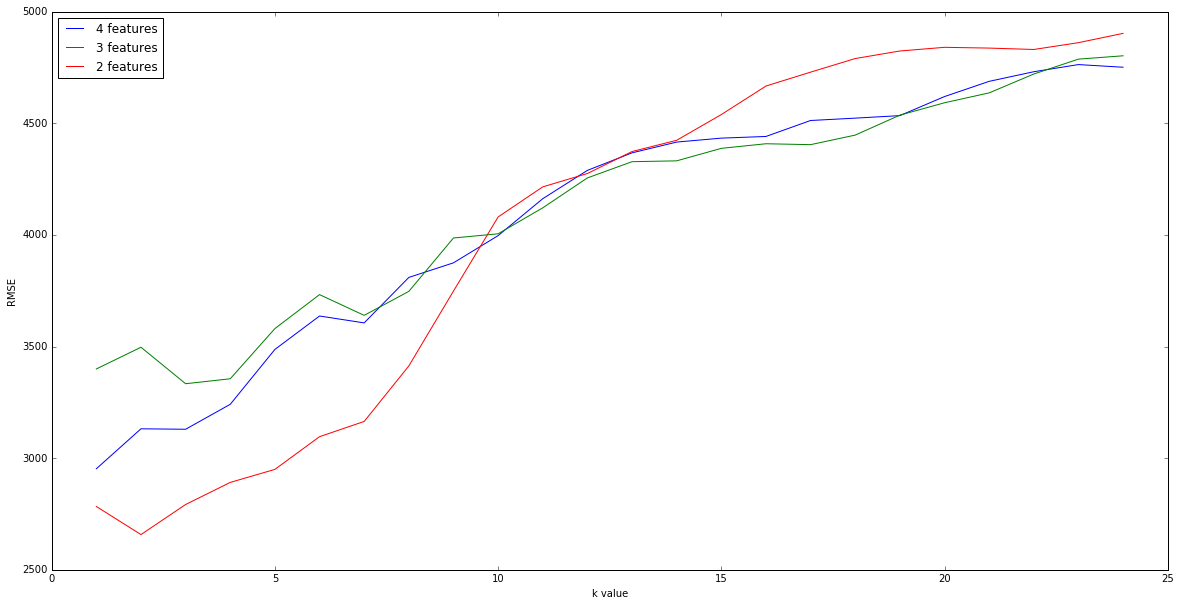

In [255]:
plt.figure(figsize=(20,10))
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

plt.legend(['4 features', '3 features', '2 features'], loc = 'upper left')

The best results for each model would be:

* 4 features: RMSE of **2952** for **k=1**

* 3 features: RMSE of **3333** for **k=3**

* 2 features: RMSE of **2657** for **k=2**

It seems as if when k increases, the model performance gets worse.  Between k=5 and k=10 the model performance decreases significantly, but moreso for only 2 features. 

It is likely that values of k=1 would not be particularly accurate, given the nature of the algorithm, since there is only one 'vote' and the more features chosen, the more similar each data point is to the other.

**Cross Validation**

Lastly, let's change the knn_train_test() function to use k-fold cross validation instead of test/train validation, to see if that improves our RMSE values

In [262]:
def knn_train_test(train_cols, target_col, df, k, kFold=False):
    np.random.seed(1)
    
    if not kFold:
        df_random = np.random.permutation(df.index)
        df = df.reindex(df_random)
    
    #Divide number of rows by 2 and round to get split data
        train_data_row = int((len(df))/2)
    
    #Split data into training and test set
        train_df = df.iloc[0:train_data_row]
        test_df = df.iloc[train_data_row:]
    
        k_rmse_values = {}
        k_values = [i for i in range(1, 25)]
    
        for k in k_values:
            knn = KNeighborsRegressor(n_neighbors=k)
            knn.fit(train_df[train_cols], train_df[target_col])
            predictions = knn.predict(test_df[train_cols])
    
            rmse = ((mean_squared_error(test_df[target_col], predictions))**0.5)
            
            k_rmse_values[k] = rmse
        
        return k_rmse_values
    
    else:
        kf = KFold(10, shuffle=True, random_state = 1)
        knn = KNeighborsRegressor(n_neighbors = k)
        mses = cross_val_score(knn , df[train_cols], df[target_col], scoring='neg_mean_squared_error' , cv=kf)
        avg_rmse = np.mean(np.sqrt(np.absolute(mses)))
        return avg_rmse
        


In [263]:
sorted_series_avg_rmse.sort_values()

engine-size          3346.484586
horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64

In [264]:
features = {
    'best_2' : ['engine-size', 'horsepower'],
    'best_3' : ['engine-size', 'horsepower', 'width'],
    'best_4' : ['engine-size', 'horsepower', 'width', 'curb-weight']
}

In [282]:
k_values = list(range(1, 24))
rmse_multi_k = {}
rmse_current = []

for key, value in features.items():
    for k in k_values:
        rmse_current.append(knn_train_test(value, 'price', normalized_cars, k, kFold=True))
        
    rmse_multi_k[key] = rmse_current
    rmse_current = []
    
print(rmse_multi_k)

{'best_4': [2537.612499640613, 2587.874651022591, 2686.3377112775206, 2806.496165126506, 3010.436378520319, 3162.225695262898, 3201.518068421089, 3274.0505289057846, 3356.0688456120856, 3449.7254086121948, 3442.1925617386755, 3494.267069401639, 3526.0907374060216, 3564.7245189681803, 3651.8246892365287, 3749.8011857320844, 3809.552980896682, 3823.8381493488537, 3893.39434996314, 3972.5398399208293, 4029.1597045020085, 4059.417129136542, 4079.5695378978953], 'best_3': [2726.9297759497135, 2703.564030002367, 2781.5659507487435, 2919.9368436139735, 3031.767371260333, 3163.352228814234, 3301.7360046271315, 3334.8298982284878, 3363.2517083798375, 3386.824559906182, 3411.1854293862043, 3427.6208376397676, 3509.0328877950074, 3590.6342069042958, 3703.78700356333, 3787.334521872598, 3881.671313708076, 3929.1416796140948, 3968.7532092638903, 4017.673376482441, 4062.2438734455523, 4107.481606795711, 4144.171318264716], 'best_2': [2844.6738023575053, 2601.2320598273477, 2636.5883949955796, 2787.5

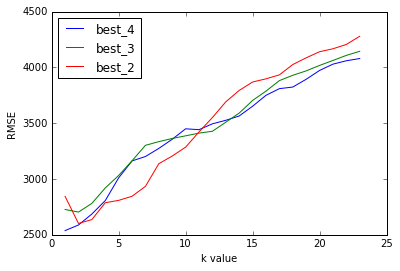

In [287]:
fig, ax = plt.subplots(1)

for key, values in rmse_multi_k.items():
    ax.plot(k_values, values, label=key)
    ax.set_xlabel('k value')
    ax.set_ylabel('RMSE')
    ax.legend(loc='upper left')

It appears that we get lower RMSE values with k-fold cross validation, using 10 folds than train-test validation:

* 4 features:  **2537 for k = 1**

* 3 features: **2703 for k = 2**

* 2 features: **2601 for k = 2**